# Prueba Baseline: MFCC con clasificador

In [1]:
import sys
sys.path.append('../')
import Datasets

import librosa
import utils
import pandas as pd
import numpy as np

## Pruebo uno solo

In [2]:
datasetName, dfAudio, dfMetadata = Datasets.getQOMvsSPA( Datasets.DATASET_RAW )

In [3]:
dfAudio.shape

(3853,)

In [4]:
rawAudio = dfAudio[0].copy()
rawAudio.resize( 16000 * 3 ) #3 segundos

In [5]:
mfcc = librosa.feature.mfcc(y=rawAudio, sr=utils.SAMPLE_RATE, n_fft = 2048, hop_length = 512, n_mfcc=20)
mfcc = np.swapaxes( mfcc, 0, 1 ).copy()
display(mfcc.shape)
mfcc_delta_1 = librosa.feature.delta(mfcc, order=1)
display(mfcc_delta_1.shape)
mfcc_delta_2 = librosa.feature.delta(mfcc, order=2)
display(mfcc_delta_2.shape)

(94, 20)

(94, 20)

(94, 20)

In [6]:
mfccAudio = np.concatenate( (mfcc,mfcc_delta_1,mfcc_delta_2), axis=1 )
mfccAudio.shape

(94, 60)

[Text(0.5, 1.0, 'MFCC-$\\Delta^2$')]

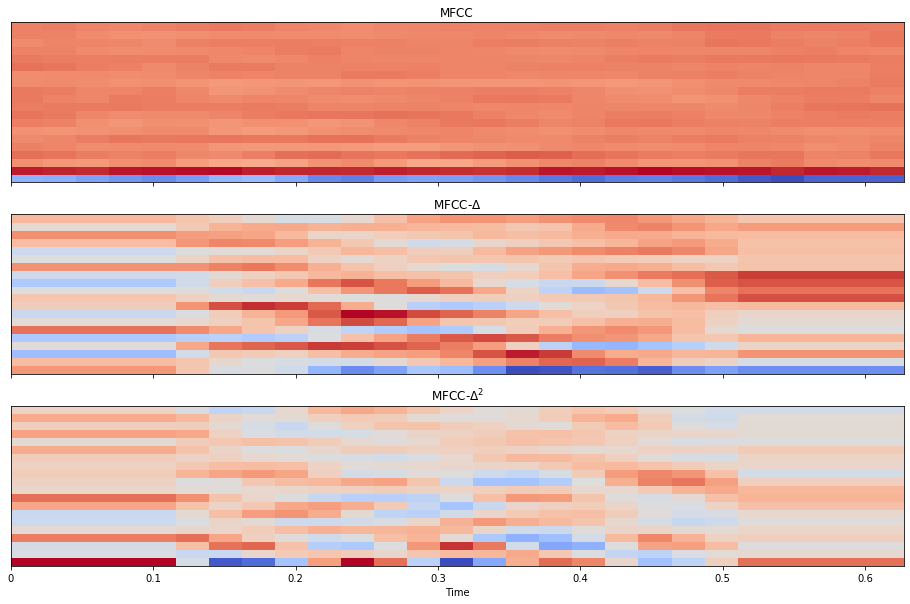

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True, figsize=(16,10))

img1 = librosa.display.specshow(mfcc, ax=ax[0], x_axis='time')

ax[0].set(title='MFCC')

ax[0].label_outer()

img2 = librosa.display.specshow(mfcc_delta_1, ax=ax[1], x_axis='time')

ax[1].set(title=r'MFCC-$\Delta$')

ax[1].label_outer()

img3 = librosa.display.specshow(mfcc_delta_2, ax=ax[2], x_axis='time')

ax[2].set(title=r'MFCC-$\Delta^2$')

# fig.colorbar(img1, ax=[ax[0]])
# fig.colorbar(img2, ax=[ax[1]])
# fig.colorbar(img3, ax=[ax[2]])

## Pruebo lo que hice en Datasets

In [2]:
datasetName, dfAudio, dfMetadata = Datasets.getQOMvsSPA( Datasets.DATASET_MFCC )

Dataset file not found. Building...
........................................................................................................................................................................................................
[ 200 / 3853 ]
........................................................................................................................................................................................................
[ 400 / 3853 ]
........................................................................................................................................................................................................
[ 600 / 3853 ]
........................................................................................................................................................................................................
[ 800 / 3853 ]
....................................................................................................

In [8]:
len(dfAudio[0].shape)

2

## Otra prueba random

In [18]:
a = np.array([1,2,3])
a.resize(2)
a

array([1, 2])

In [7]:
import numpy as np
import torch as pt

In [8]:
#lst = [ np.random.uniform( size=(50, 70) ), np.random.uniform( size=(50, 70) ), np.random.uniform( size=(50, 70) ) ]
lst = []
for i in range(3):
    lst.append(np.random.uniform( size=(50, 70) ))

In [11]:
np.array(lst).shape

(3, 50, 70)

## Una mas

In [8]:
from models import *
from torchinfo import summary

In [9]:
m = Baseline()

In [10]:
 np.expand_dims(np.swapaxes(mfccAudio,0,1),0).shape

(1, 60, 94)

In [11]:
ptMFCCAudio = pt.from_numpy( np.expand_dims(np.swapaxes(mfccAudio,0,1),0))
ptMFCCAudio.shape

torch.Size([1, 60, 94])

In [12]:
m(ptMFCCAudio)

torch.Size([1, 60, 94])
torch.Size([1, 32, 94])
torch.Size([1, 32, 94])
torch.Size([1, 16, 92])
torch.Size([1, 16])


tensor([[0.4811]], grad_fn=<SigmoidBackward>)